## Ajuste de un modelo de regresion lineal multiple a los datos de peso-edad-presion

In [1]:
library(alr4)
library(MPV)

Loading required package: car

Loading required package: carData

Loading required package: effects

lattice theme set by effectsTheme()
See ?effectsTheme for details.

Loading required package: lattice

Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Loading required package: randomForest

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



In [2]:
peso.edad.presion <- read.table("Peso-Edad-Presion.txt",header=T)

In [3]:
peso.edad.presion
edad <- peso.edad.presion$Edad
presion <- peso.edad.presion$Presion
peso <- peso.edad.presion$Peso

Peso,Edad,Presion
<int>,<int>,<int>
152,50,120
183,20,141
171,20,124
165,30,126
158,30,117
161,50,129
149,60,123
158,50,125
170,40,132


## Graficas de dispersion  

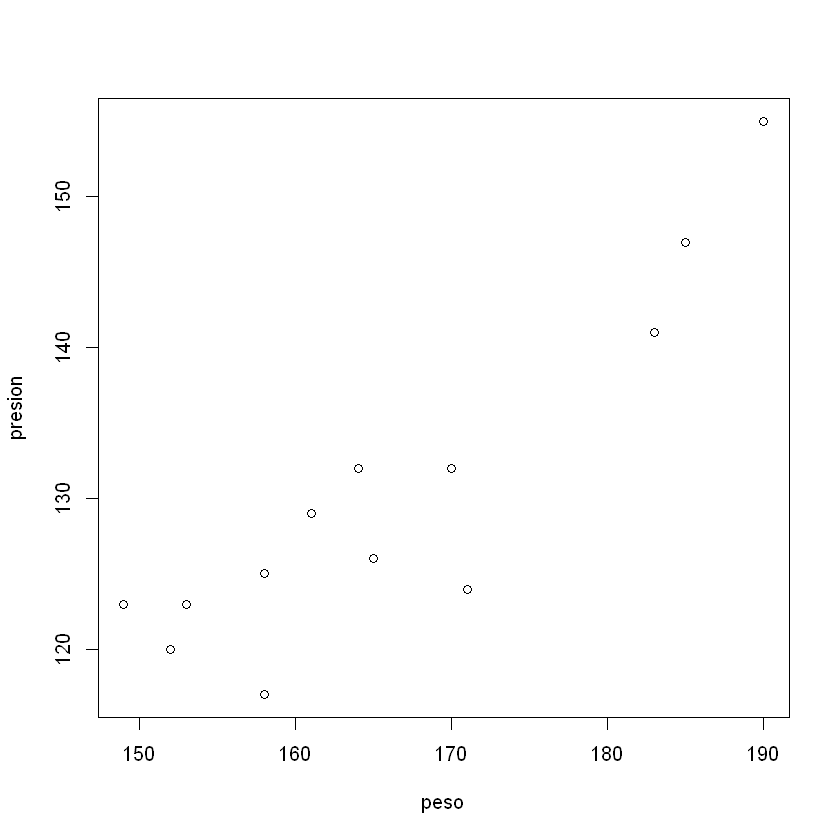

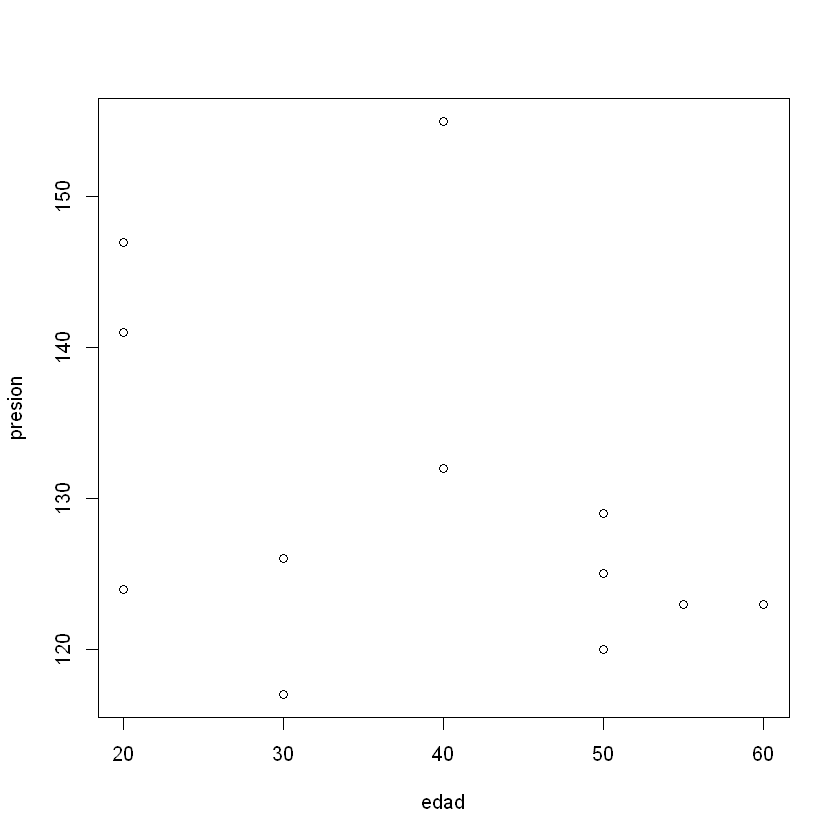

In [4]:
plot(peso,presion)
plot(edad,presion)

## Matriz de graficas de dispersion 

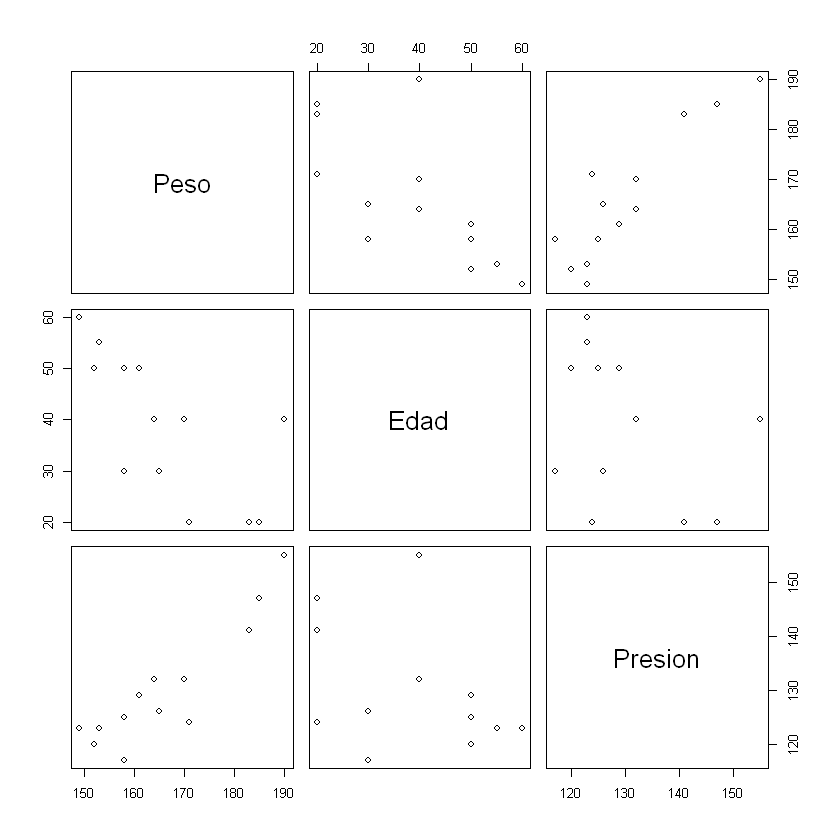

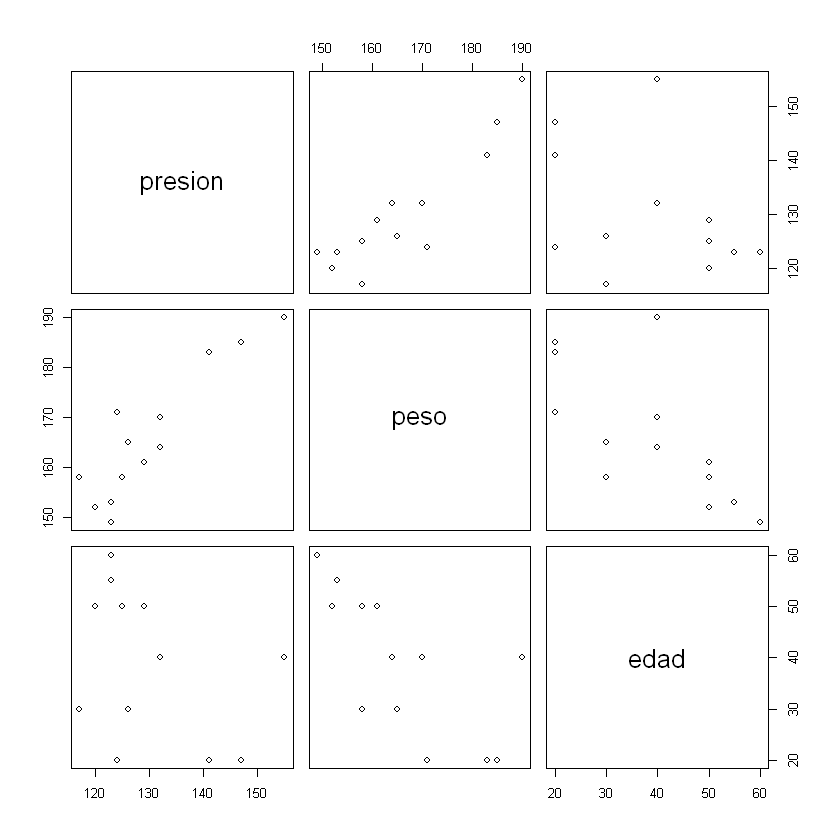

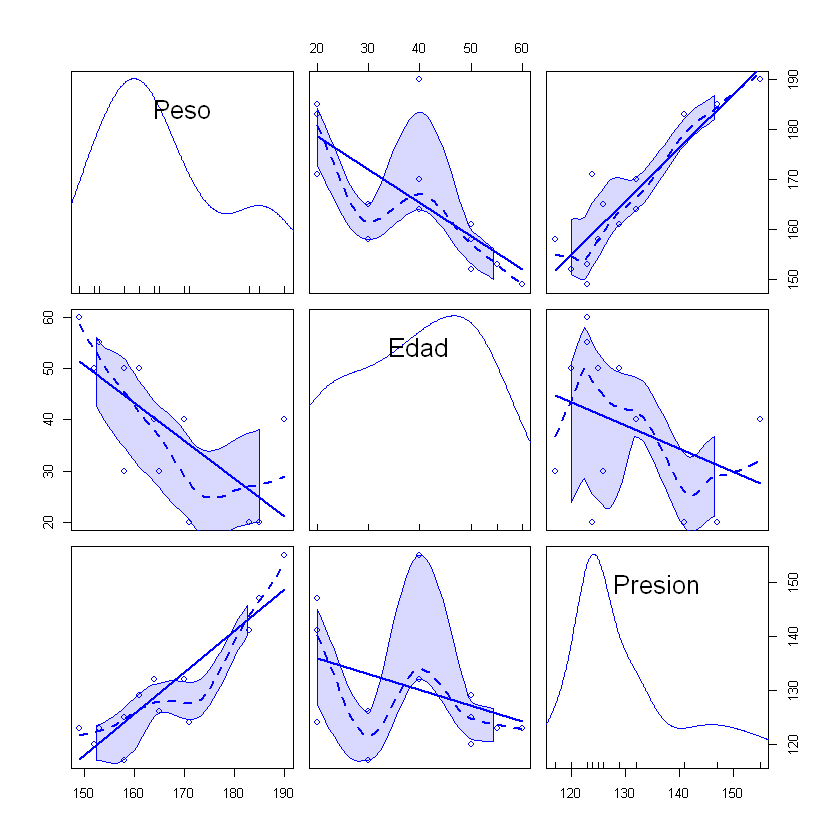

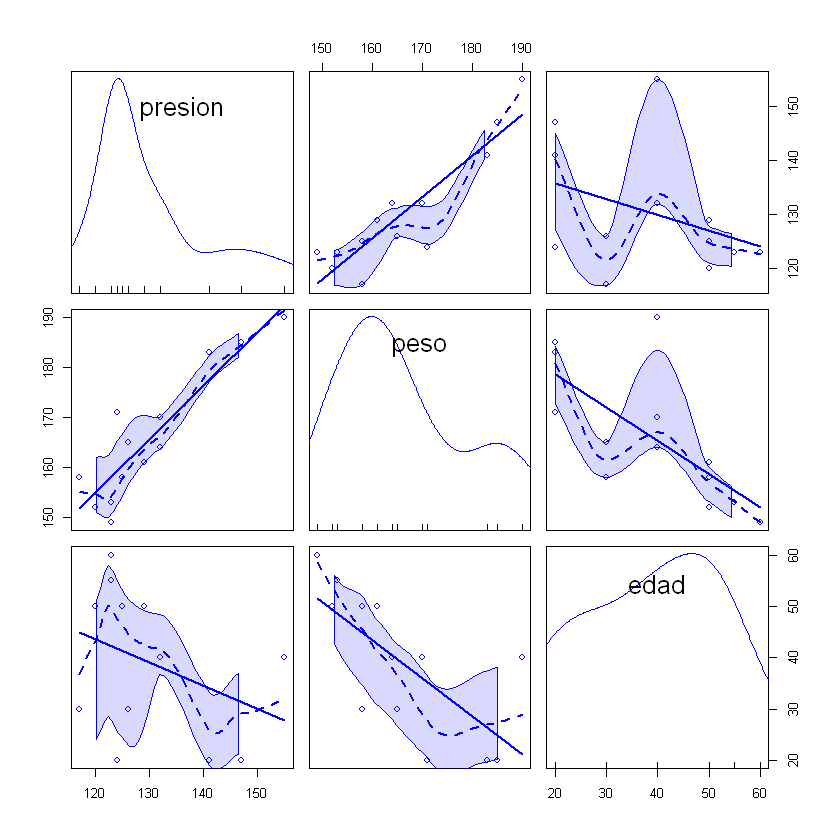

In [5]:
pairs( peso.edad.presion )
pairs(~ presion + peso + edad)
scatterplotMatrix( peso.edad.presion )
scatterplotMatrix( ~ presion + peso + edad  )

## Ajuste del modelo presion = beta0 + beta1 * peso + beta2 * edad  

In [6]:
reg.presion.peso.edad <- lm(presion ~ peso + edad) 
summary(reg.presion.peso.edad)
anova(reg.presion.peso.edad)
coefficients(reg.presion.peso.edad)
confint(reg.presion.peso.edad, level = 0.983) # Bonferroni ajuste
residuals(reg.presion.peso.edad)
fitted.values(reg.presion.peso.edad)
vcov(reg.presion.peso.edad)


Call:
lm(formula = presion ~ peso + edad)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5929 -1.3530 -0.0946  0.6155  4.3276 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -65.09968   14.94458  -4.356 0.001430 ** 
peso          1.07710    0.07707  13.975 6.89e-08 ***
edad          0.42541    0.07315   5.815 0.000169 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.509 on 10 degrees of freedom
Multiple R-squared:  0.9577,	Adjusted R-squared:  0.9492 
F-statistic: 113.1 on 2 and 10 DF,  p-value: 1.359e-07


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
peso,1,1211.00800,1211.008001,192.43345,7.39309e-08
edad,1,212.82997,212.829967,33.81943,1.69363e-04
Residuals,10,62.93126,6.293126,NA,NA


(Intercept)        peso        edad 
-65.0996781   1.0771015   0.4254134

,0.85 %,99.15 %
(Intercept),-107.8190319,-22.3803244
peso,0.8567891,1.2974138
edad,0.2163062,0.6345207


1          2          3          4          5          6          7 
 0.1095860  0.4818440 -3.5929386  0.6155358 -0.8447541 -0.5843271  2.0867560 
         8          9         10         11         12         13 
-1.3530227 -3.0241058 -0.0945826  3.4385029 -1.5661348  4.3276411

1        2        3        4        5        6        7        8 
119.8904 140.5182 127.5929 125.3845 117.8448 129.5843 120.9132 126.3530 
       9       10       11       12       13 
135.0241 123.0946 128.5615 156.5661 142.6724

,(Intercept),peso,edad
(Intercept),223.3403359,-1.139890094,-0.863581242
peso,-1.1398901,0.005940125,0.003948203
edad,-0.8635812,0.003948203,0.005351260


## Graficas de variable agregada  

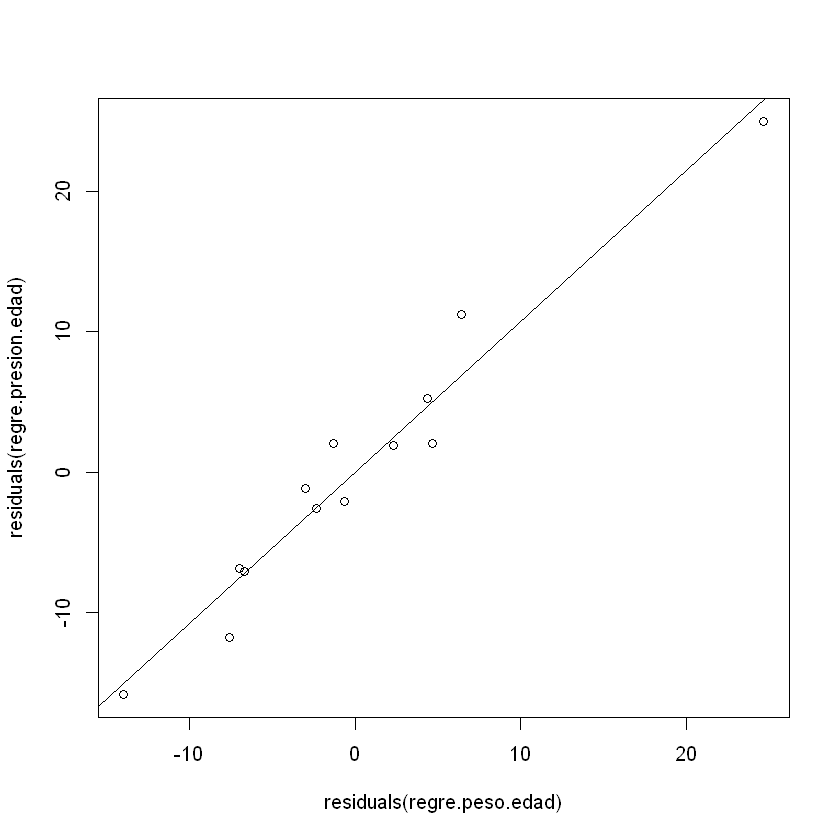

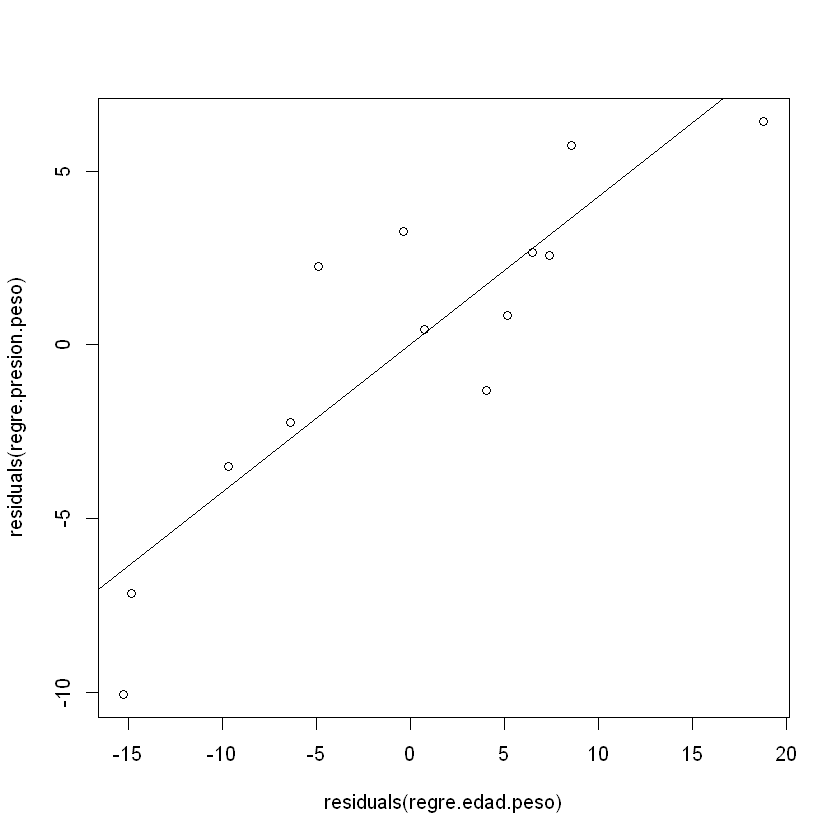

In [7]:
regre.presion.edad <- lm(presion ~ edad)
regre.peso.edad <- lm(peso ~ edad )
plot( residuals(regre.peso.edad),residuals(regre.presion.edad))
abline(lm(residuals(regre.presion.edad)~residuals(regre.peso.edad) ))
regre.presion.peso <- (lm( presion ~ peso))
regre.edad.peso <- lm(edad ~ peso )
plot( residuals(regre.edad.peso),residuals(regre.presion.peso))
abline(lm(residuals(regre.presion.peso)~residuals(regre.edad.peso) ))

## Alternativa usando funcion avPlots

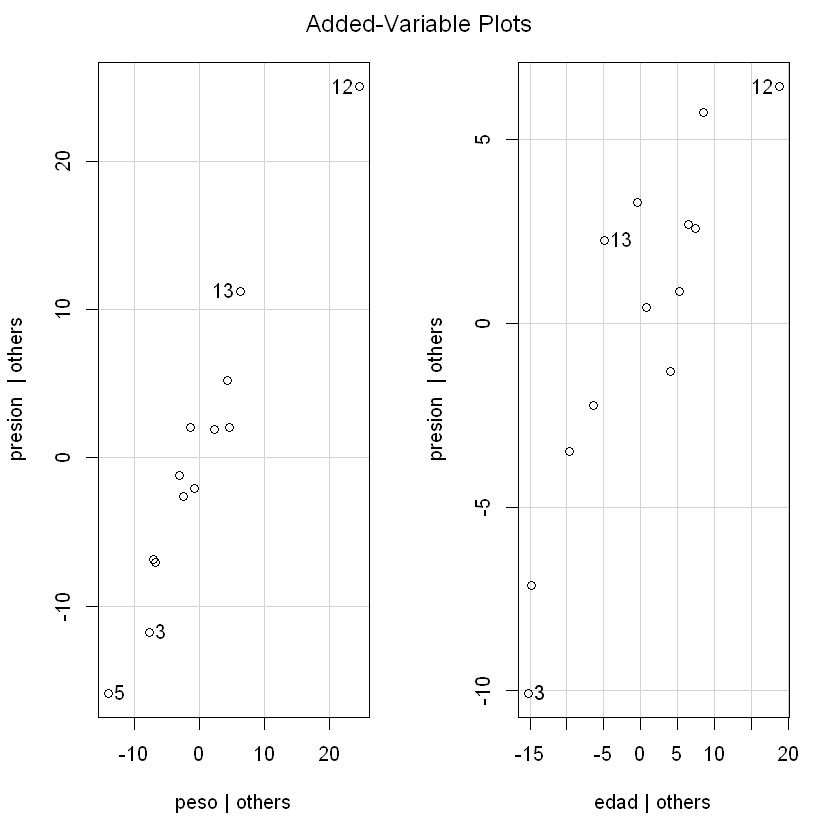

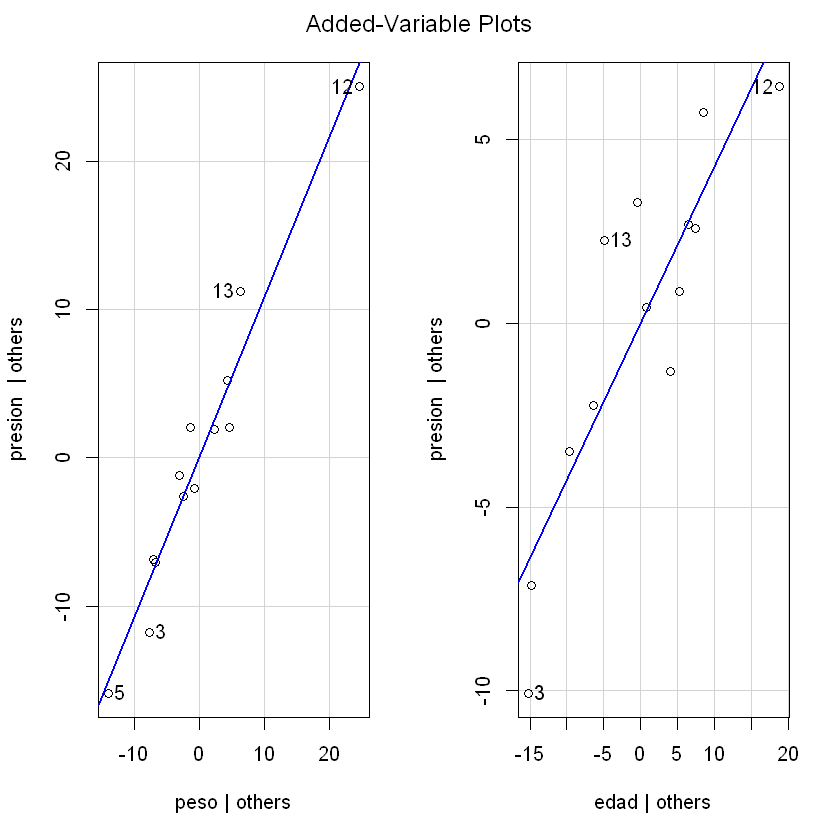

In [8]:
pesoedadpresion <- lm (presion ~ peso + edad)
avPlots(pesoedadpresion, lwd=-1)
avPlots(pesoedadpresion)

## Graficas de residuos  

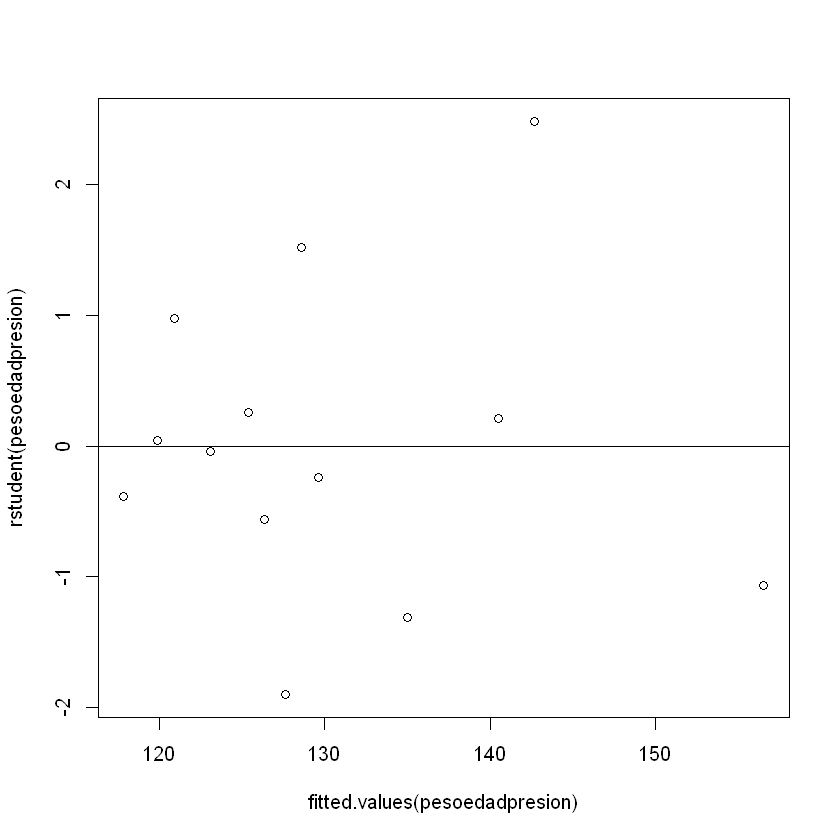

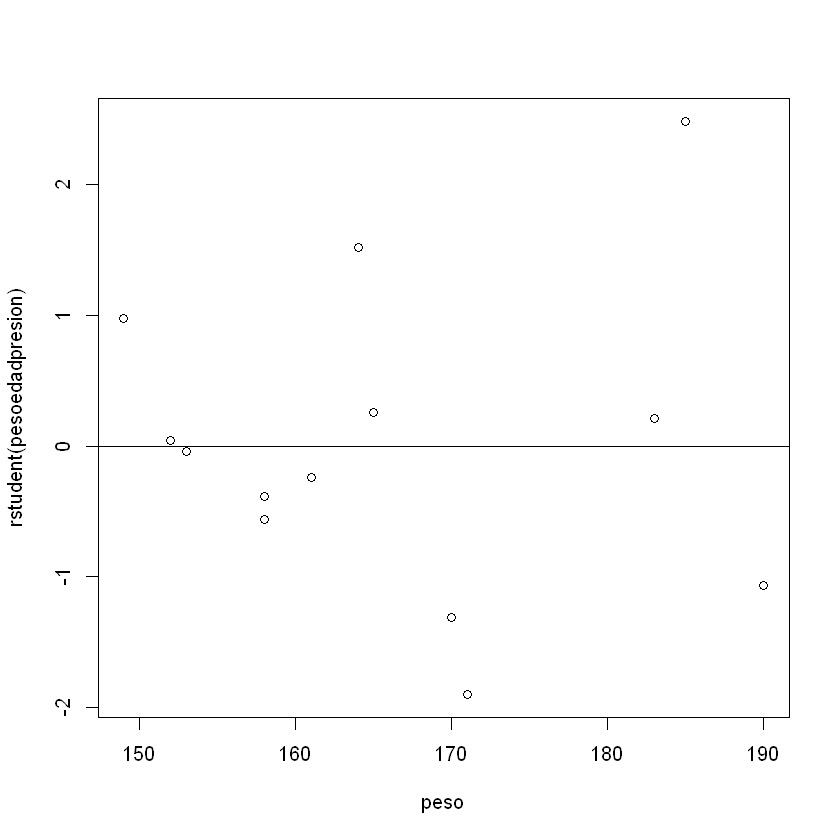

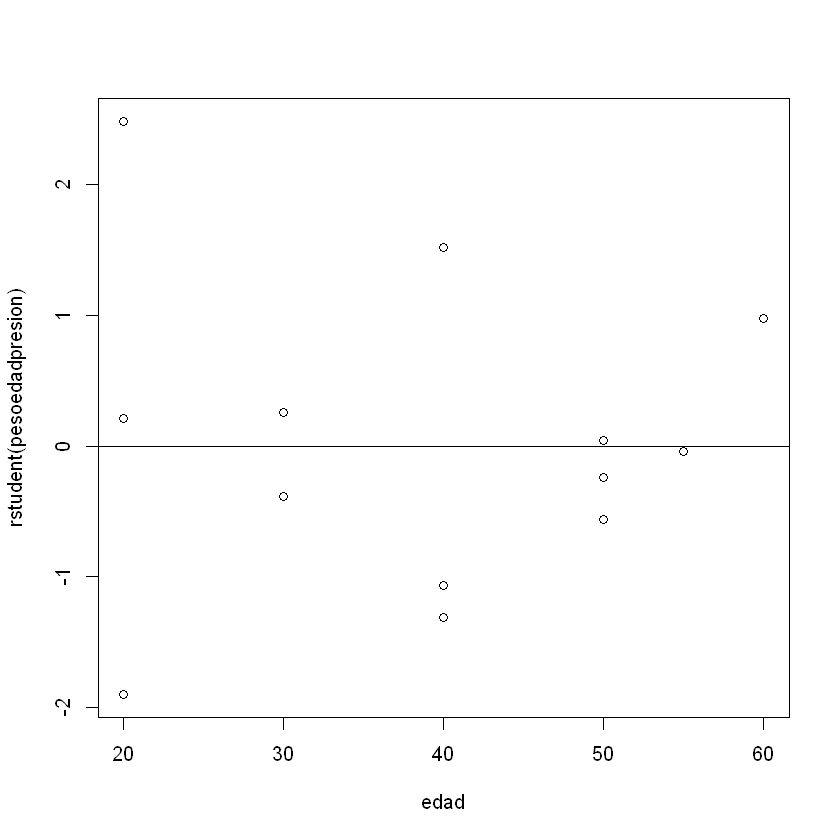

In [9]:
plot(fitted.values(pesoedadpresion),rstudent(pesoedadpresion))
abline(h=0)
plot(peso,rstudent(pesoedadpresion))
abline(h=0)
plot(edad,rstudent(pesoedadpresion))
abline(h=0)

## Graficas de residuos y Pruebas de no linealidad

           Test stat Pr(>|Test stat|)
peso          1.0607           0.3165
edad          0.8080           0.4399
Tukey test   -0.3507           0.7258


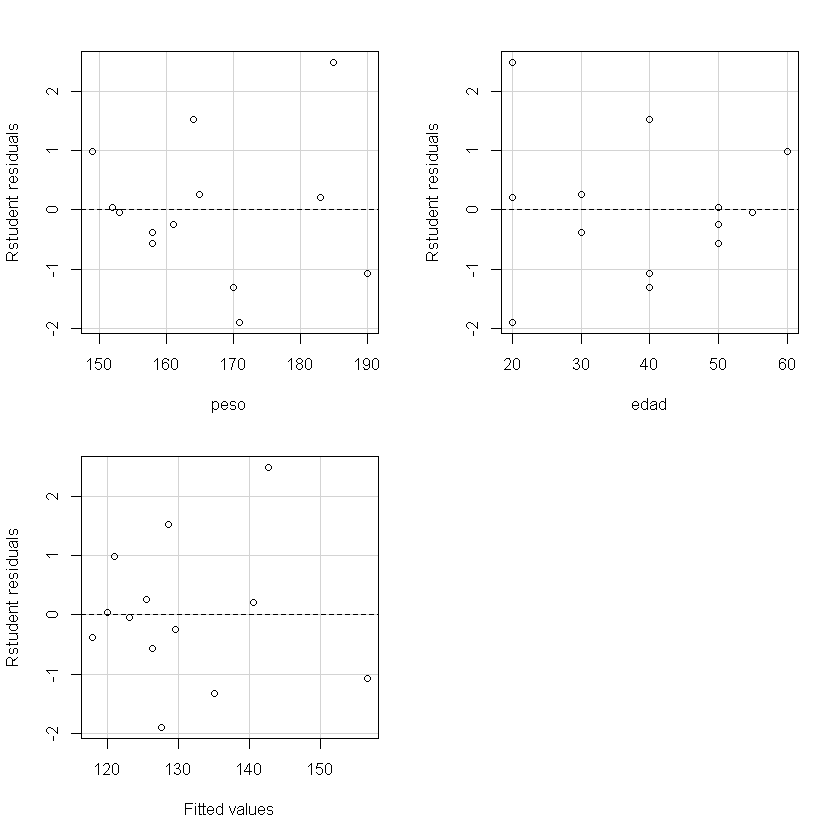

In [10]:
residualPlots(pesoedadpresion, terms= ~. , type = "rstudent", quadratic=FALSE)

## Graficas de modelo marginal

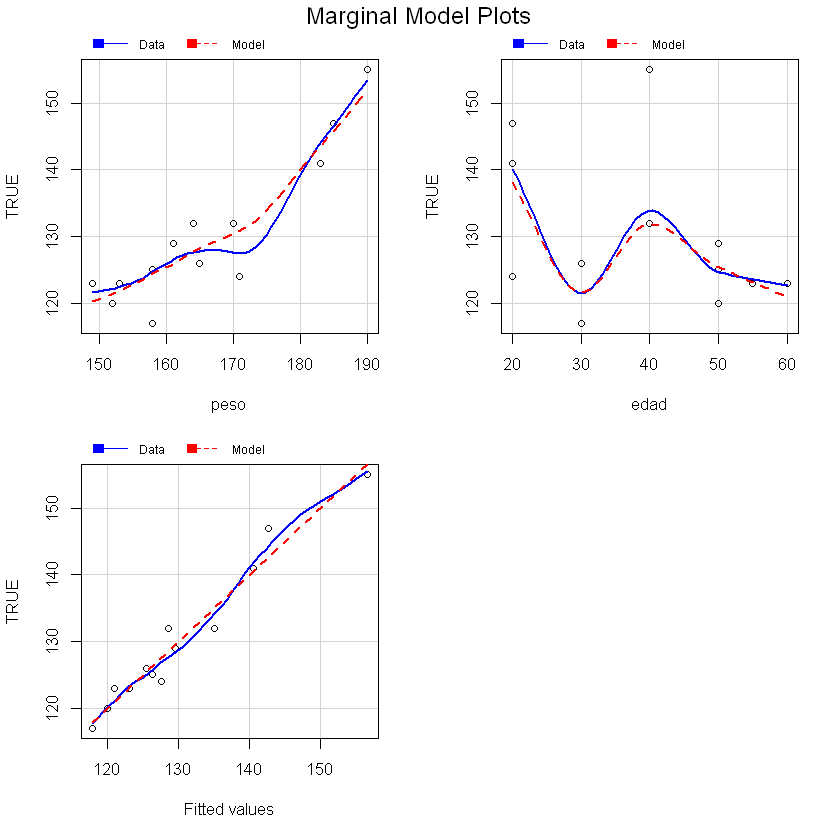

In [11]:
marginalModelPlots(pesoedadpresion)

## Pruebas sobre homogeneidad de la varianza

In [12]:
ncvTest(pesoedadpresion)
ncvTest(pesoedadpresion, ~ peso + edad)
ncvTest(pesoedadpresion, ~ peso)
ncvTest(pesoedadpresion, ~ edad)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.7684072, Df = 1, p = 0.38071

Non-constant Variance Score Test 
Variance formula: ~ peso + edad 
Chisquare = 2.156725, Df = 2, p = 0.34015

Non-constant Variance Score Test 
Variance formula: ~ peso 
Chisquare = 1.597614, Df = 1, p = 0.20624

Non-constant Variance Score Test 
Variance formula: ~ edad 
Chisquare = 2.01333, Df = 1, p = 0.15592

## Grafica de probabilidad normal

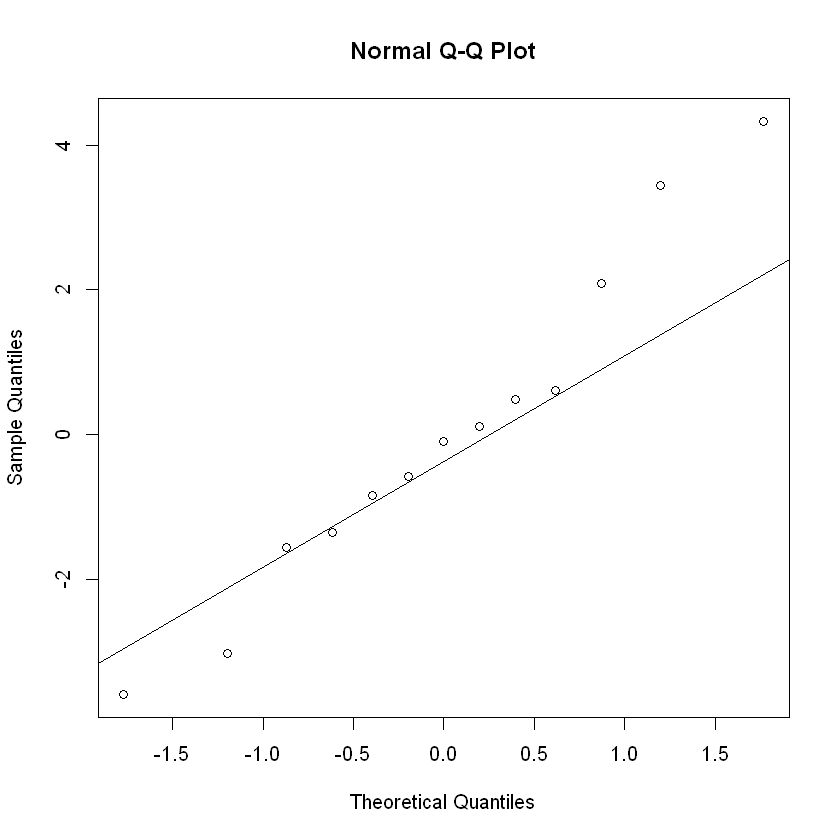

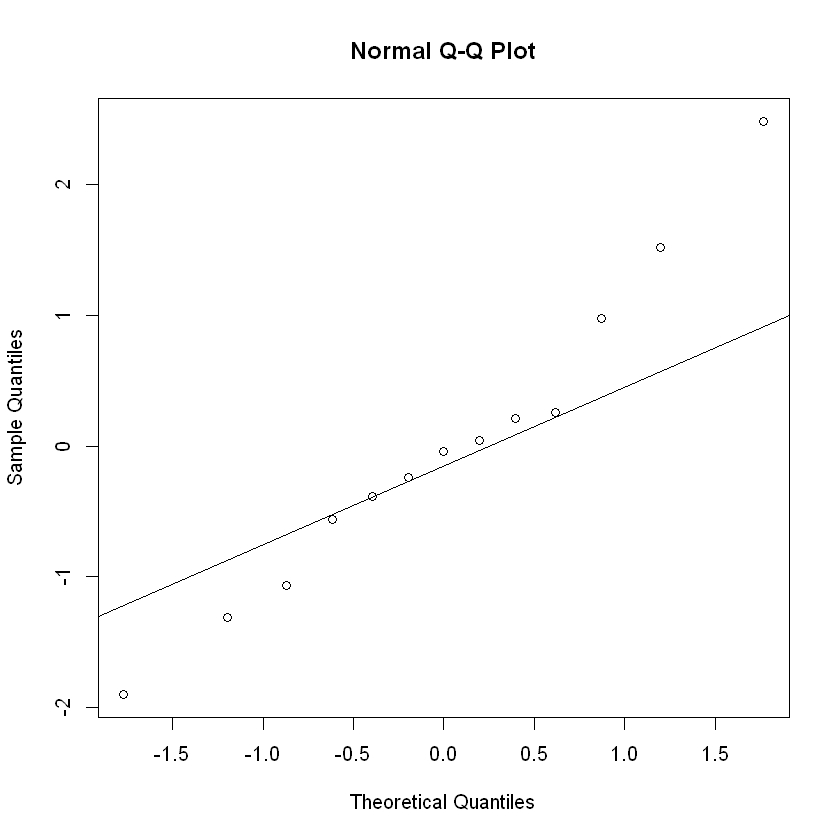

[1] 13  3

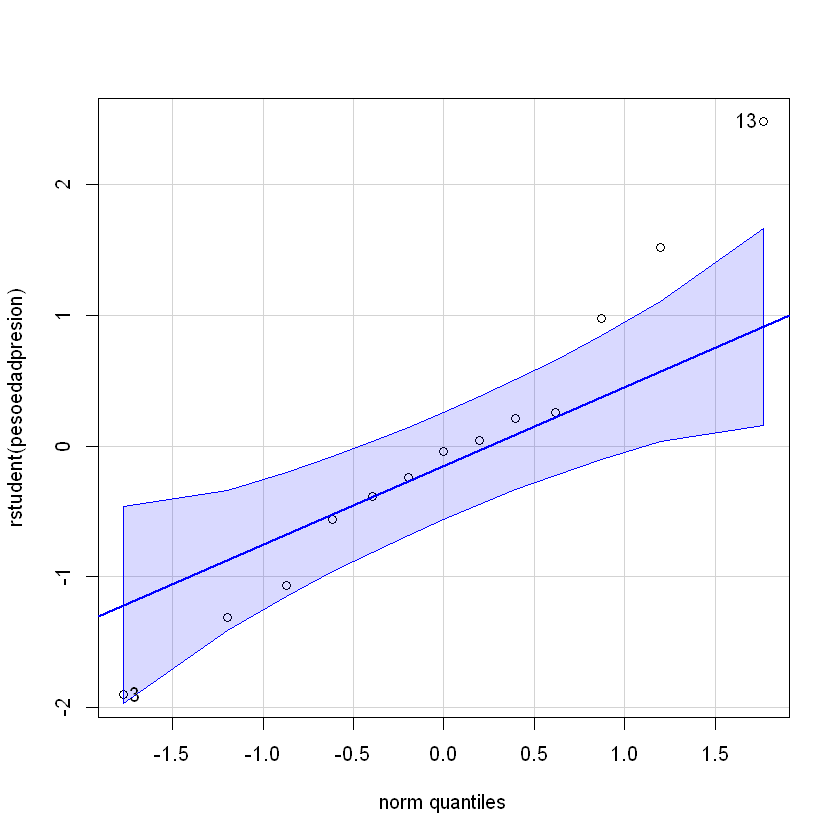

[1] 13  3

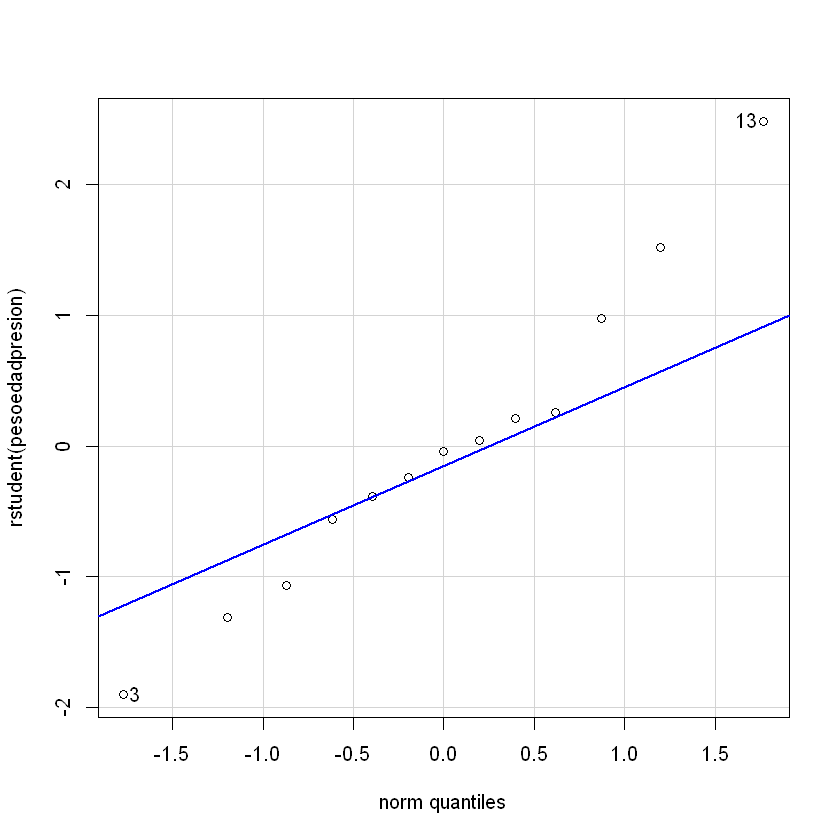

In [14]:
qqnorm(residuals(pesoedadpresion)) 
qqline(residuals(pesoedadpresion))
qqnorm(rstudent(pesoedadpresion))
qqline(rstudent(pesoedadpresion))

qqPlot(rstudent(pesoedadpresion))
qqPlot(rstudent(pesoedadpresion), envelope=FALSE)

## Prueba Shapiro-Wilk para normalidad

In [15]:
shapiro.test(rstudent(pesoedadpresion))
shapiro.test(rstandard(pesoedadpresion))


	Shapiro-Wilk normality test

data:  rstudent(pesoedadpresion)
W = 0.96926, p-value = 0.8853



	Shapiro-Wilk normality test

data:  rstandard(pesoedadpresion)
W = 0.97437, p-value = 0.9404


## Prueba Durbin-Watson para detectar autocorrelacion en los errores

In [16]:
durbinWatsonTest( pesoedadpresion )

 lag Autocorrelation D-W Statistic p-value
   1      -0.2553499      2.212907   0.886
 Alternative hypothesis: rho != 0

## Prueba de puntos discrepantes

In [17]:
outlierTest(pesoedadpresion)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
13 2.487277           0.034576      0.44949

## Diagnosticos de influencia

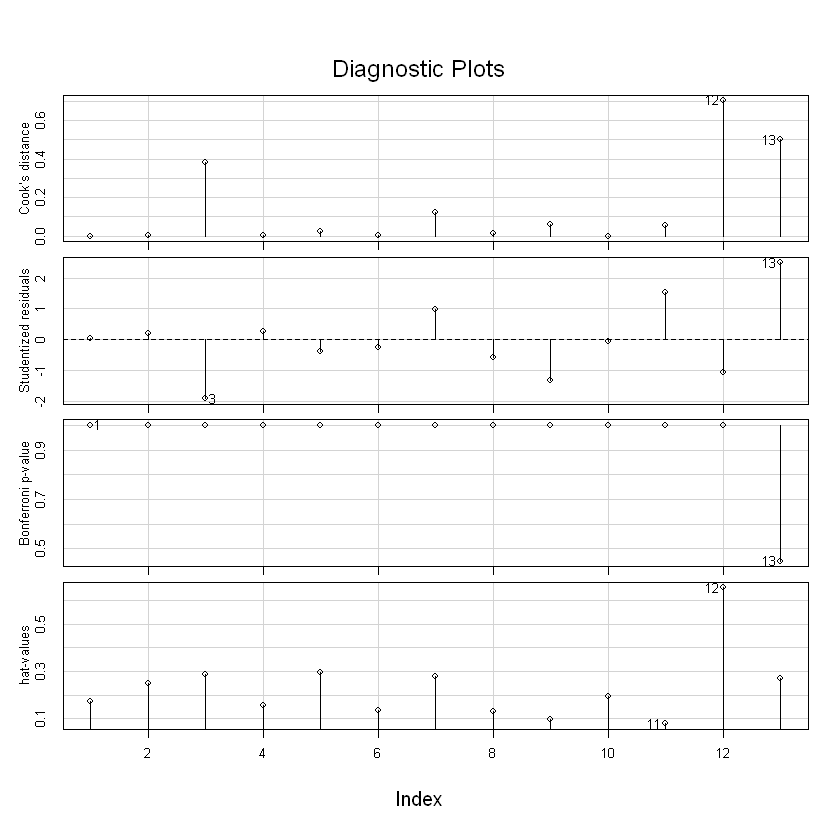

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
3,-1.903618,0.2854012,0.38215821
5,-0.383486,0.2946956,0.02239202
12,-1.066978,0.6529019,0.70406702
13,2.487277,0.2694555,0.50085088


1            2            3            4            5            6 
0.0001605615 0.0054321999 0.3821582056 0.0044148498 0.0223920186 0.0032944388 
           7            8            9           10           11           12 
0.1241244743 0.0168626715 0.0585372825 0.0001427692 0.0584292409 0.7040670184 
          13 
0.5008508767

1            2            3            4            5            6 
3.016021e-06 5.898758e-04 2.318521e-01 4.326998e-04 4.840289e-03 2.792886e-04 
           7            8            9           10           11           12 
5.629056e-02 3.183513e-03 1.962611e-02 2.528908e-06 1.957421e-02 4.289984e-01 
          13 
3.099171e-01

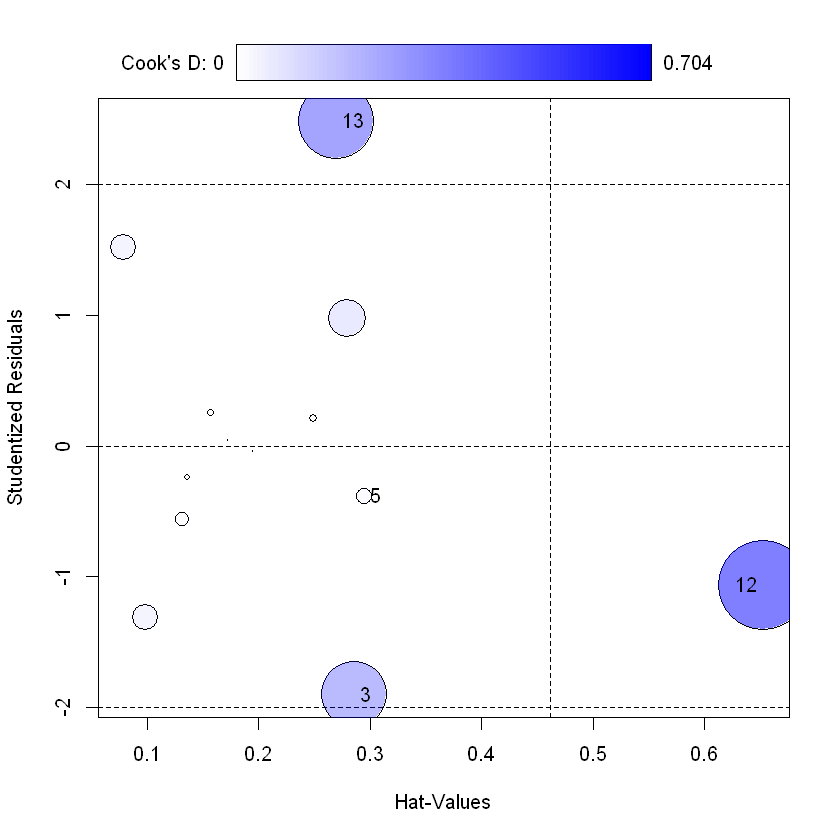

In [18]:
infIndexPlot(pesoedadpresion)

influencePlot(pesoedadpresion)

cooks.distance(pesoedadpresion)

pf(cooks.distance(pesoedadpresion), 3, 10)
